# 6.3 Geographic Visualization 

### This script contains the following:
#### 1. Importing data and libraries
#### 2. Data wrangling and merging
#### 3. Data cleaning
#### 4. Plotting a choropleth
##### A. Using Geoplot
##### B. Using matplotlib



### 1. Importing data and libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os
import geopandas as gpd
import geoplot

In [2]:
# This command prompts matplotlib visuals to appear in the notebook.

%matplotlib inline

In [3]:
path = 'C:/Users/asus/Documents/Career Foundry/Achievement 6'

In [4]:
# Import ".shp" file for the U.S. shape outline using the Geopandas `read_csv` command.

usa = gpd.read_file(os.path.join(path, '6.3 Images & Assets', 'Data', 'USA_States.shp'))

In [5]:
# View the head of the new Geodataframe.

usa.head()

,STATE_NAME,STATE_FIPS,STATE_ABBR,geometry
0,Washington,53,WA,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628..."
1,Montana,30,MT,"POLYGON ((-111.47543 44.70216, -111.48080 44.6..."
2,Maine,23,ME,"MULTIPOLYGON (((-69.77728 44.07415, -69.85993 ..."
3,North Dakota,38,ND,"POLYGON ((-98.73044 45.93827, -99.00683 45.939..."
4,South Dakota,46,SD,"POLYGON ((-102.78838 42.99530, -103.00588 42.9..."


In [7]:
# Import the recipes data.

df = pd.read_csv(os.path.join(path, '6.3 Images & Assets', 'Data', 'recipes.csv'))

In [8]:
df.head()

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
df.shape

(20052, 680)

### 2. Data wrangling and merging

##### Fix dummy columns

In [10]:
# Select only the necessary columns and put them in a list called columns.

columns = ["alabama",
"alaska",
"arizona",
"california",
"colorado",
"connecticut",
"florida",
"georgia",
"hawaii",
"idaho",
"illinois",
"indiana",
"iowa",
"kansas",
"kentucky",
"louisiana",
"maine",
"maryland",
"massachusetts",
"michigan",
"minnesota",
"mississippi",
"missouri",
"nebraska",
"new hampshire",
"new jersey",
"new mexico",
"new york",
"north carolina",
"ohio",
"oklahoma",
"oregon",
"pennsylvania",
"rhode island",
"south carolina",
"tennessee",
"texas",
"utah",
"vermont",
"virginia",
"washington",
"west virginia",
"wisconsin",
"title",
"rating",
"calories",
"protein",
"fat",
"sodium"
]

In [11]:
# Create a subset.

state_rec = df[columns]

In [12]:
state_rec.head()

,alabama,alaska,arizona,california,colorado,connecticut,florida,georgia,hawaii,idaho,...,virginia,washington,west virginia,wisconsin,title,rating,calories,protein,fat,sodium
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0


In [13]:
# Select only the states from `state_rec` in a new subset.

states_num = state_rec[["alabama",
"alaska",
"arizona",
"california",
"colorado",
"connecticut",
"florida",
"georgia",
"hawaii",
"idaho",
"illinois",
"indiana",
"iowa",
"kansas",
"kentucky",
"louisiana",
"maine",
"maryland",
"massachusetts",
"michigan",
"minnesota",
"mississippi",
"missouri",
"nebraska",
"new hampshire",
"new jersey",
"new mexico",
"new york",
"north carolina",
"ohio",
"oklahoma",
"oregon",
"pennsylvania",
"rhode island",
"south carolina",
"tennessee",
"texas",
"utah",
"vermont",
"virginia",
"washington",
"west virginia",
"wisconsin"]]

In [14]:
# This command turns the dummy data from the states columns into a categorical variable in s2, which is a pandas series data structure.

s2 = states_num.idxmax(axis=1)

# You haven't encountered series yet. Just know that it's another type of data structure in pandas. It's similar to a dataframe but 
# differs in that it's one-dimensional. This means it can only have one column, whereas a dataframe has (at least) two, making it
# two-dimensional. You can turn any dataframe column into a series, and you can add any series to a dataframe as a column!

In [15]:
s2

0           alabama
1           alabama
2          new york
3           alabama
4        california
            ...    
20047       alabama
20048       alabama
20049       alabama
20050       alabama
20051       alabama
Length: 20052, dtype: object

In [16]:
type(s2)

pandas.core.series.Series

In [17]:
# Create new column "state" in the `state_rec` dataframe.

state_rec['STATE_NAME'] = s2

C:\Users\asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [18]:
state_rec.columns

Index(['alabama', 'alaska', 'arizona', 'california', 'colorado', 'connecticut',
       'florida', 'georgia', 'hawaii', 'idaho', 'illinois', 'indiana', 'iowa',
       'kansas', 'kentucky', 'louisiana', 'maine', 'maryland', 'massachusetts',
       'michigan', 'minnesota', 'mississippi', 'missouri', 'nebraska',
       'new hampshire', 'new jersey', 'new mexico', 'new york',
       'north carolina', 'ohio', 'oklahoma', 'oregon', 'pennsylvania',
       'rhode island', 'south carolina', 'tennessee', 'texas', 'utah',
       'vermont', 'virginia', 'washington', 'west virginia', 'wisconsin',
       'title', 'rating', 'calories', 'protein', 'fat', 'sodium',
       'STATE_NAME'],
      dtype='object')

In [19]:
# Drop the dummy columns from the dataframe.

state_rec.drop(columns = ["alabama",
"alaska",
"arizona",
"california",
"colorado",
"connecticut",
"florida",
"georgia",
"hawaii",
"idaho",
"illinois",
"indiana",
"iowa",
"kansas",
"kentucky",
"louisiana",
"maine",
"maryland",
"massachusetts",
"michigan",
"minnesota",
"mississippi",
"missouri",
"nebraska",
"new hampshire",
"new jersey",
"new mexico",
"new york",
"north carolina",
"ohio",
"oklahoma",
"oregon",
"pennsylvania",
"rhode island",
"south carolina",
"tennessee",
"texas",
"utah",
"vermont",
"virginia",
"washington",
"west virginia",
"wisconsin"], inplace = True)

C:\Users\asus\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [20]:
state_rec.columns

Index(['title', 'rating', 'calories', 'protein', 'fat', 'sodium',
       'STATE_NAME'],
      dtype='object')

In [21]:
# The state names in the U.S. Geodataframe need to be transformed into lowercase so that they match the names
# in the recipes dataframe.

usa['STATE_NAME'] = usa['STATE_NAME'].str.lower()

In [22]:
usa.head()

,STATE_NAME,STATE_FIPS,STATE_ABBR,geometry
0,washington,53,WA,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628..."
1,montana,30,MT,"POLYGON ((-111.47543 44.70216, -111.48080 44.6..."
2,maine,23,ME,"MULTIPOLYGON (((-69.77728 44.07415, -69.85993 ..."
3,north dakota,38,ND,"POLYGON ((-98.73044 45.93827, -99.00683 45.939..."
4,south dakota,46,SD,"POLYGON ((-102.78838 42.99530, -103.00588 42.9..."


##### Merge dataframes into a single Geodataframe

In [23]:
# Merge both dataframes on the "STATE_NAME" column.

# NB: You need to merge the recipes dataframe INTO the GeoDataFrame; otherwise, the output will be a pandas dataframe rather 
# than a Geopandas dataframe.

usa_m = usa.merge(state_rec, on = 'STATE_NAME', how = 'outer', indicator = True)

In [24]:
type(usa_m)

geopandas.geodataframe.GeoDataFrame

In [25]:
usa_m.shape

(20060, 11)

In [26]:
usa_m['_merge'].value_counts()

both          20052
left_only         8
right_only        0
Name: _merge, dtype: int64

In [27]:
usa_m.head()

,STATE_NAME,STATE_FIPS,STATE_ABBR,geometry,title,rating,calories,protein,fat,sodium,_merge
0,washington,53,WA,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628...",Cornmeal Waffles,1.875,NaN,NaN,NaN,NaN,both
1,washington,53,WA,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628...",Chicken Enchiladas,4.375,532.0,25.0,32.0,1329.0,both
2,washington,53,WA,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628...",Risotto with Chicken and Beet Greens Stalker,3.750,557.0,29.0,18.0,511.0,both
3,washington,53,WA,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628...","Roast Goose with Garlic, Onion and Sage Stuffing",3.125,8603.0,13.0,923.0,1401.0,both
4,washington,53,WA,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628...",Ham and Sage Ponice,2.500,273.0,19.0,10.0,629.0,both


### 3. Data cleaning

In [28]:
# Check for missing values.

usa_m.isnull().sum()

STATE_NAME       0
STATE_FIPS       0
STATE_ABBR       0
geometry         0
title            8
rating           8
calories      4125
protein       4170
fat           4191
sodium        4127
_merge           0
dtype: int64

In [29]:
# Remove the 8 observations that don't have a title or rating.

usa_clean = usa_m[usa_m['title'].isnull() == False]

In [30]:
# By removing the 8 observations above, you also solved the problem of not having a full match after the merge.

usa_clean['_merge'].value_counts(dropna = False)

both          20052
right_only        0
left_only         0
Name: _merge, dtype: int64

All the observations can be found in both data sets!

In [31]:
# See what's left to fix.

usa_clean.isnull().sum()

STATE_NAME       0
STATE_FIPS       0
STATE_ABBR       0
geometry         0
title            0
rating           0
calories      4117
protein       4162
fat           4183
sodium        4119
_merge           0
dtype: int64

In [32]:
# Impute missing values with the median.

usa_clean['calories'].fillna(usa_clean['calories'].median(), inplace=True)
usa_clean['protein'].fillna(usa_clean['protein'].median(), inplace=True)
usa_clean['fat'].fillna(usa_clean['fat'].median(), inplace=True)
usa_clean['sodium'].fillna(usa_clean['sodium'].median(), inplace=True)

C:\Users\asus\Anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [33]:
# Last check for NaN.

usa_clean.isnull().sum()

STATE_NAME    0
STATE_FIPS    0
STATE_ABBR    0
geometry      0
title         0
rating        0
calories      0
protein       0
fat           0
sodium        0
_merge        0
dtype: int64

##### Duplicates check

In [34]:
dups = usa_clean.duplicated()

In [35]:
dups.shape # No dups

(20052,)

##### Extreme values checks

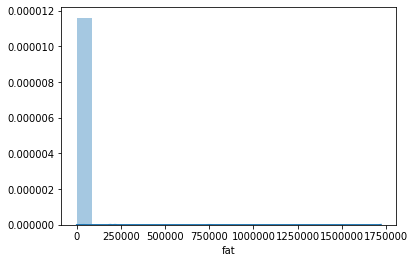

In [36]:
sns.distplot(usa_clean['fat'], bins=20) # Shows extreme values for "fat"

In [37]:
# Check how many extreme values.

usa_clean[usa_clean['fat'] >1000]

,STATE_NAME,STATE_FIPS,STATE_ABBR,geometry,title,rating,calories,protein,fat,sodium,_merge
1814,alabama,01,AL,"POLYGON ((-85.07007 31.98070, -85.11515 31.907...","Rice Pilaf with Lamb, Carrots, and Raisins",5.000,4157357.0,236489.0,221495.0,3134853.0,both
2329,alabama,01,AL,"POLYGON ((-85.07007 31.98070, -85.11515 31.907...",Bacon-Wrapped Trout Stuffed with Balsamic Onio...,4.375,12010.0,403.0,1115.0,18212.0,both
3440,alabama,01,AL,"POLYGON ((-85.07007 31.98070, -85.11515 31.907...",Lamb Köfte with Tarator Sauce,5.000,4518216.0,166471.0,44198.0,7540990.0,both
3734,alabama,01,AL,"POLYGON ((-85.07007 31.98070, -85.11515 31.907...",Braised Short Ribs with Red Wine Gravy,3.750,19576.0,723.0,1818.0,2950.0,both
5537,alabama,01,AL,"POLYGON ((-85.07007 31.98070, -85.11515 31.907...",Caramelized Apple and Pear Pie,3.125,3358029.0,58324.0,186642.0,3449373.0,both
6724,alabama,01,AL,"POLYGON ((-85.07007 31.98070, -85.11515 31.907...",Deep-Dish Wild Blueberry Pie,4.375,29997918.0,200210.0,1716279.0,27570999.0,both
6989,alabama,01,AL,"POLYGON ((-85.07007 31.98070, -85.11515 31.907...",Braised Orange-Ginger Short Ribs with Dried Ap...,4.375,16050.0,592.0,1480.0,2629.0,both
7250,alabama,01,AL,"POLYGON ((-85.07007 31.98070, -85.11515 31.907...",Chocolate-Almond Pie,3.125,3358273.0,58334.0,186660.0,3449512.0,both
8495,alabama,01,AL,"POLYGON ((-85.07007 31.98070, -85.11515 31.907...",Grilled Lamb Chops with Porcini Mustard,5.000,24117.0,940.0,2228.0,4382.0,both
9157,alabama,01,AL,"POLYGON ((-85.07007 31.98070, -85.11515 31.907...",Grilled Cumin Chicken Breasts with Avocado Salsa,3.750,22312.0,332.0,1007.0,13820.0,both


In [38]:
# Clean extreme values.

usa_edit = usa_clean[usa_clean['fat'] < 500] 
# 500 was picked because it would be impossible for a single meal to have over 500 grams of fat!

In [39]:
usa_edit.shape

(20012, 11)

In [40]:
# Create a "cal_per_portion" column.

usa_edit['cal_per_portion'] = usa_edit['calories']*4

C:\Users\asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


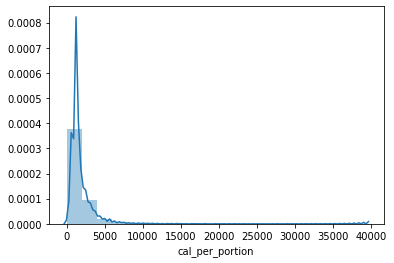

In [41]:
sns.distplot(usa_edit['cal_per_portion'], bins=20)  # Shows extreme values for "cal_per_portion"

In [42]:
# Clean extreme values in "cal_per_portion"

usa_edit = usa_edit[usa_edit['cal_per_portion'] < 8000]

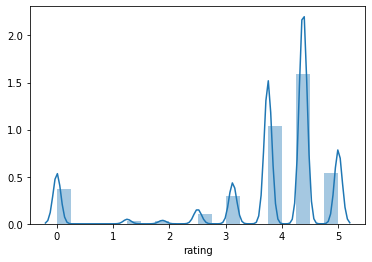

In [43]:
# Check the rating variable.

sns.distplot(usa_edit['rating'], bins=20)

In [44]:
# Select only entries with a non-zero rating.

usa_edit = usa_edit[usa_edit['rating'] >= 1]

In [45]:
usa_edit.dtypes

STATE_NAME           object
STATE_FIPS           object
STATE_ABBR           object
geometry           geometry
title                object
rating              float64
calories            float64
protein             float64
fat                 float64
sodium              float64
_merge             category
cal_per_portion     float64
dtype: object

##### Saving the GeoDataFrame

In [46]:
usa_edit.drop(columns ="_merge", inplace = True) 
# It's necessary to drop the categorical column; otherwise, the `to_file` function breaks.

In [47]:
out = r"C:/Users/asus/Documents/Career Foundry/Achievement 6/6.3 Images & Assets/Data/Calories.shp"
usa_edit.to_file(out)

### Plotting a choropleth

#### A. Using Geoplot

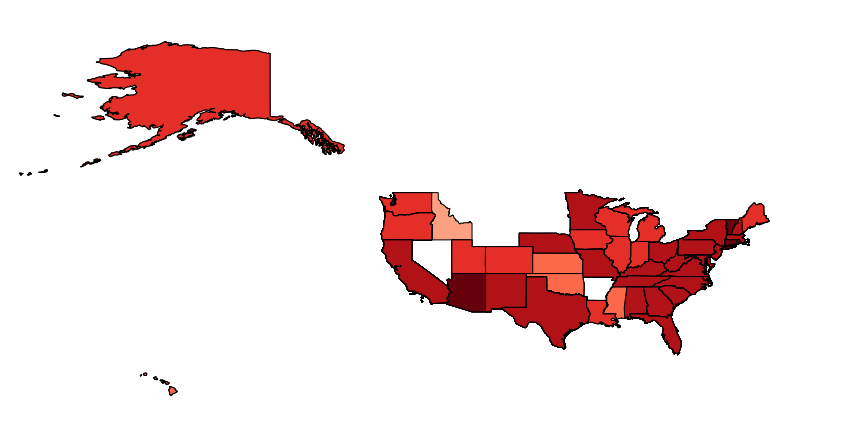

In [49]:
gp = geoplot.choropleth(
    usa_edit, hue = usa_edit['rating'], scheme = None,
    cmap='Reds', figsize=(15, 15)
)

#### B. Using matplotlib

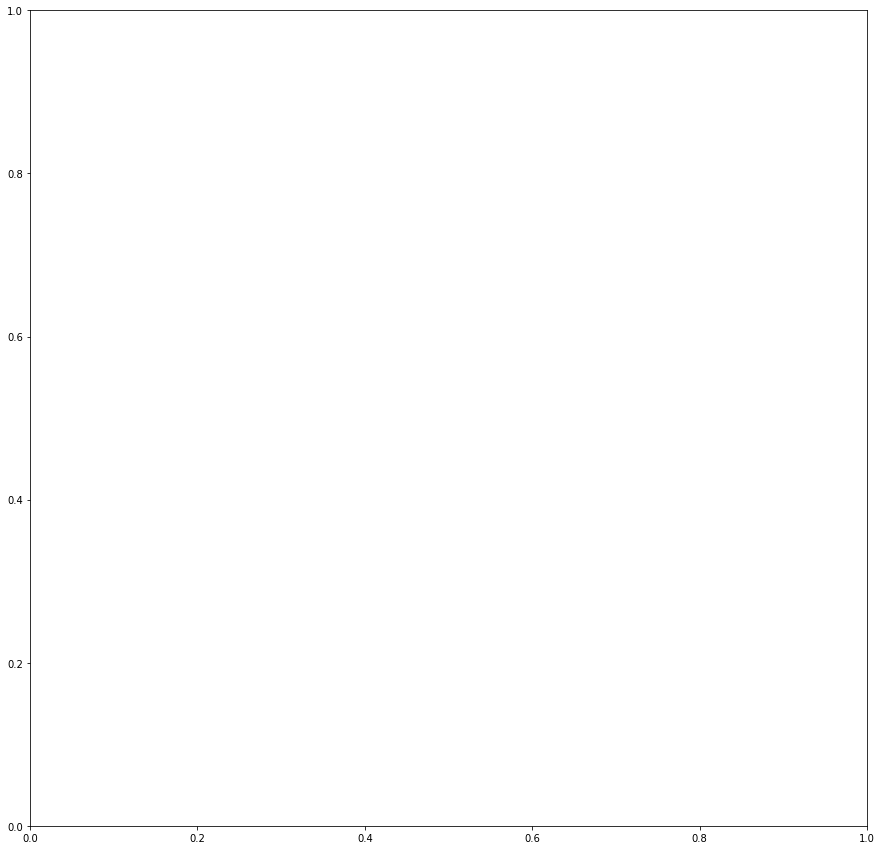

In [50]:
# Create a subplot with `fig` and `ax`.
fig, ax = plt.subplots(1, figsize=(15, 15))

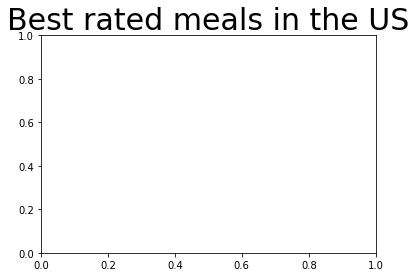

In [51]:
plt.title('Best rated meals in the US', size=30)
tl = usa_edit.plot(column='rating',
cmap='Reds',      # Color map for the states                     
             linewidth=0.6,      # Line width for state borders
             ax=ax,              # Plotting the map on `ax`
             edgecolor='black'); # State border colors

In [52]:
c_bar_colors = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=usa_edit['rating'].min(), vmax=usa_edit['rating'].max()))

# Plot the colorbar.
color_bar = fig.colorbar(c_bar_colors)

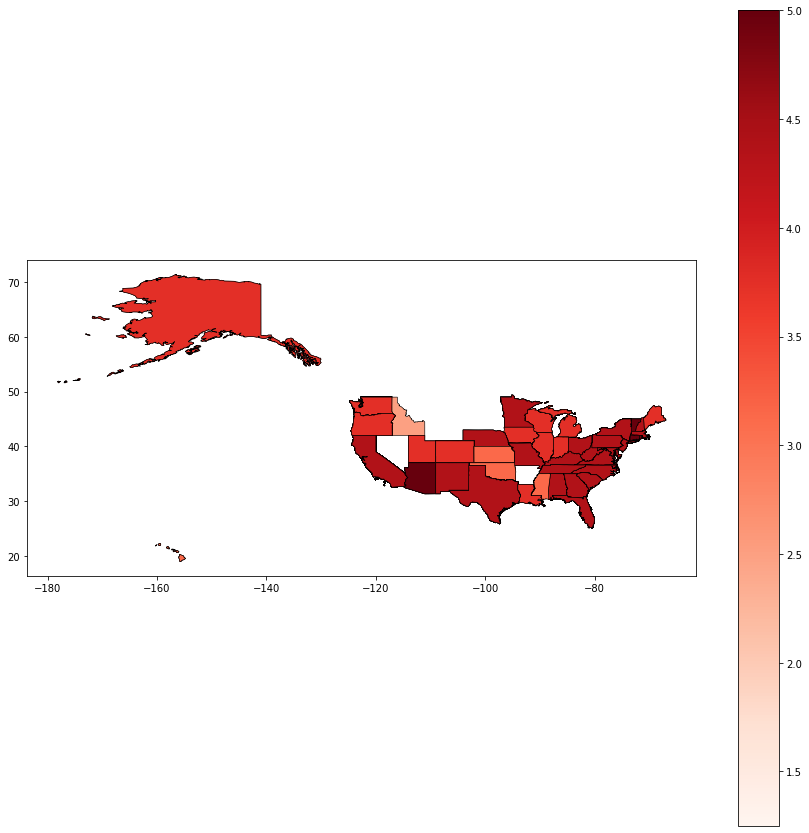

In [53]:
tl.figure